In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from df_utils import * 

In [2]:
masses = [0.01, 0.05, 0.4]
equidist_points = [0 , 1, 2]
count_point=0
run = "run3"
m_ratio = 0.6


figure_path = '/home/lmlepin/Desktop/Plots_DT_Drive/2023/det_var/'
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_signal_det_vars/".format(run)

In [3]:
if(run=="run3"):
    dt_variation = ["ly_atten", "ly_down", "ly_rayleigh", "recomb", "sce", "wiremod_anglexz", "wiremod_angleyz", "wiremod_dEdx", "wiremod_x", "wiremod_yz"]   
    variation_legend =['Light Yield Attenuation',
                   'Light Yield Down',
                   'Light Yield Rayleigh',
                   'Recombination',
                   'SCE',
                   'Wire Mod dEdx',
                   r'Wire Mod $\theta_{xz}$',
                   r'Wire Mod $\theta_{yz}$',
                   'Wire Mod X',
                   'Wire Mod YZ']

    variations_colors =["crimson", "magenta","brown", "blue", "skyblue", "lime", "forestgreen", "gold", "peru","slategray"]

else:
    dt_variation = ["ly_down", "ly_rayleigh", "recomb", "sce", "wiremod_anglexz", "wiremod_angleyz", "wiremod_dEdx", "wiremod_x", "wiremod_yz"]   
    variation_legend =['Light Yield Down',
                   'Light Yield Rayleigh',
                   'Recombination',
                   'SCE',
                   'Wire Mod dEdx',
                   r'Wire Mod $\theta_{xz}$',
                   r'Wire Mod $\theta_{yz}$',
                   'Wire Mod X',
                   'Wire Mod YZ']

    variations_colors =["magenta","brown", "blue", "skyblue", "lime", "forestgreen", "gold", "peru","slategray"]
        

Min entries:  2520
Min entries:  2558
Min entries:  2100


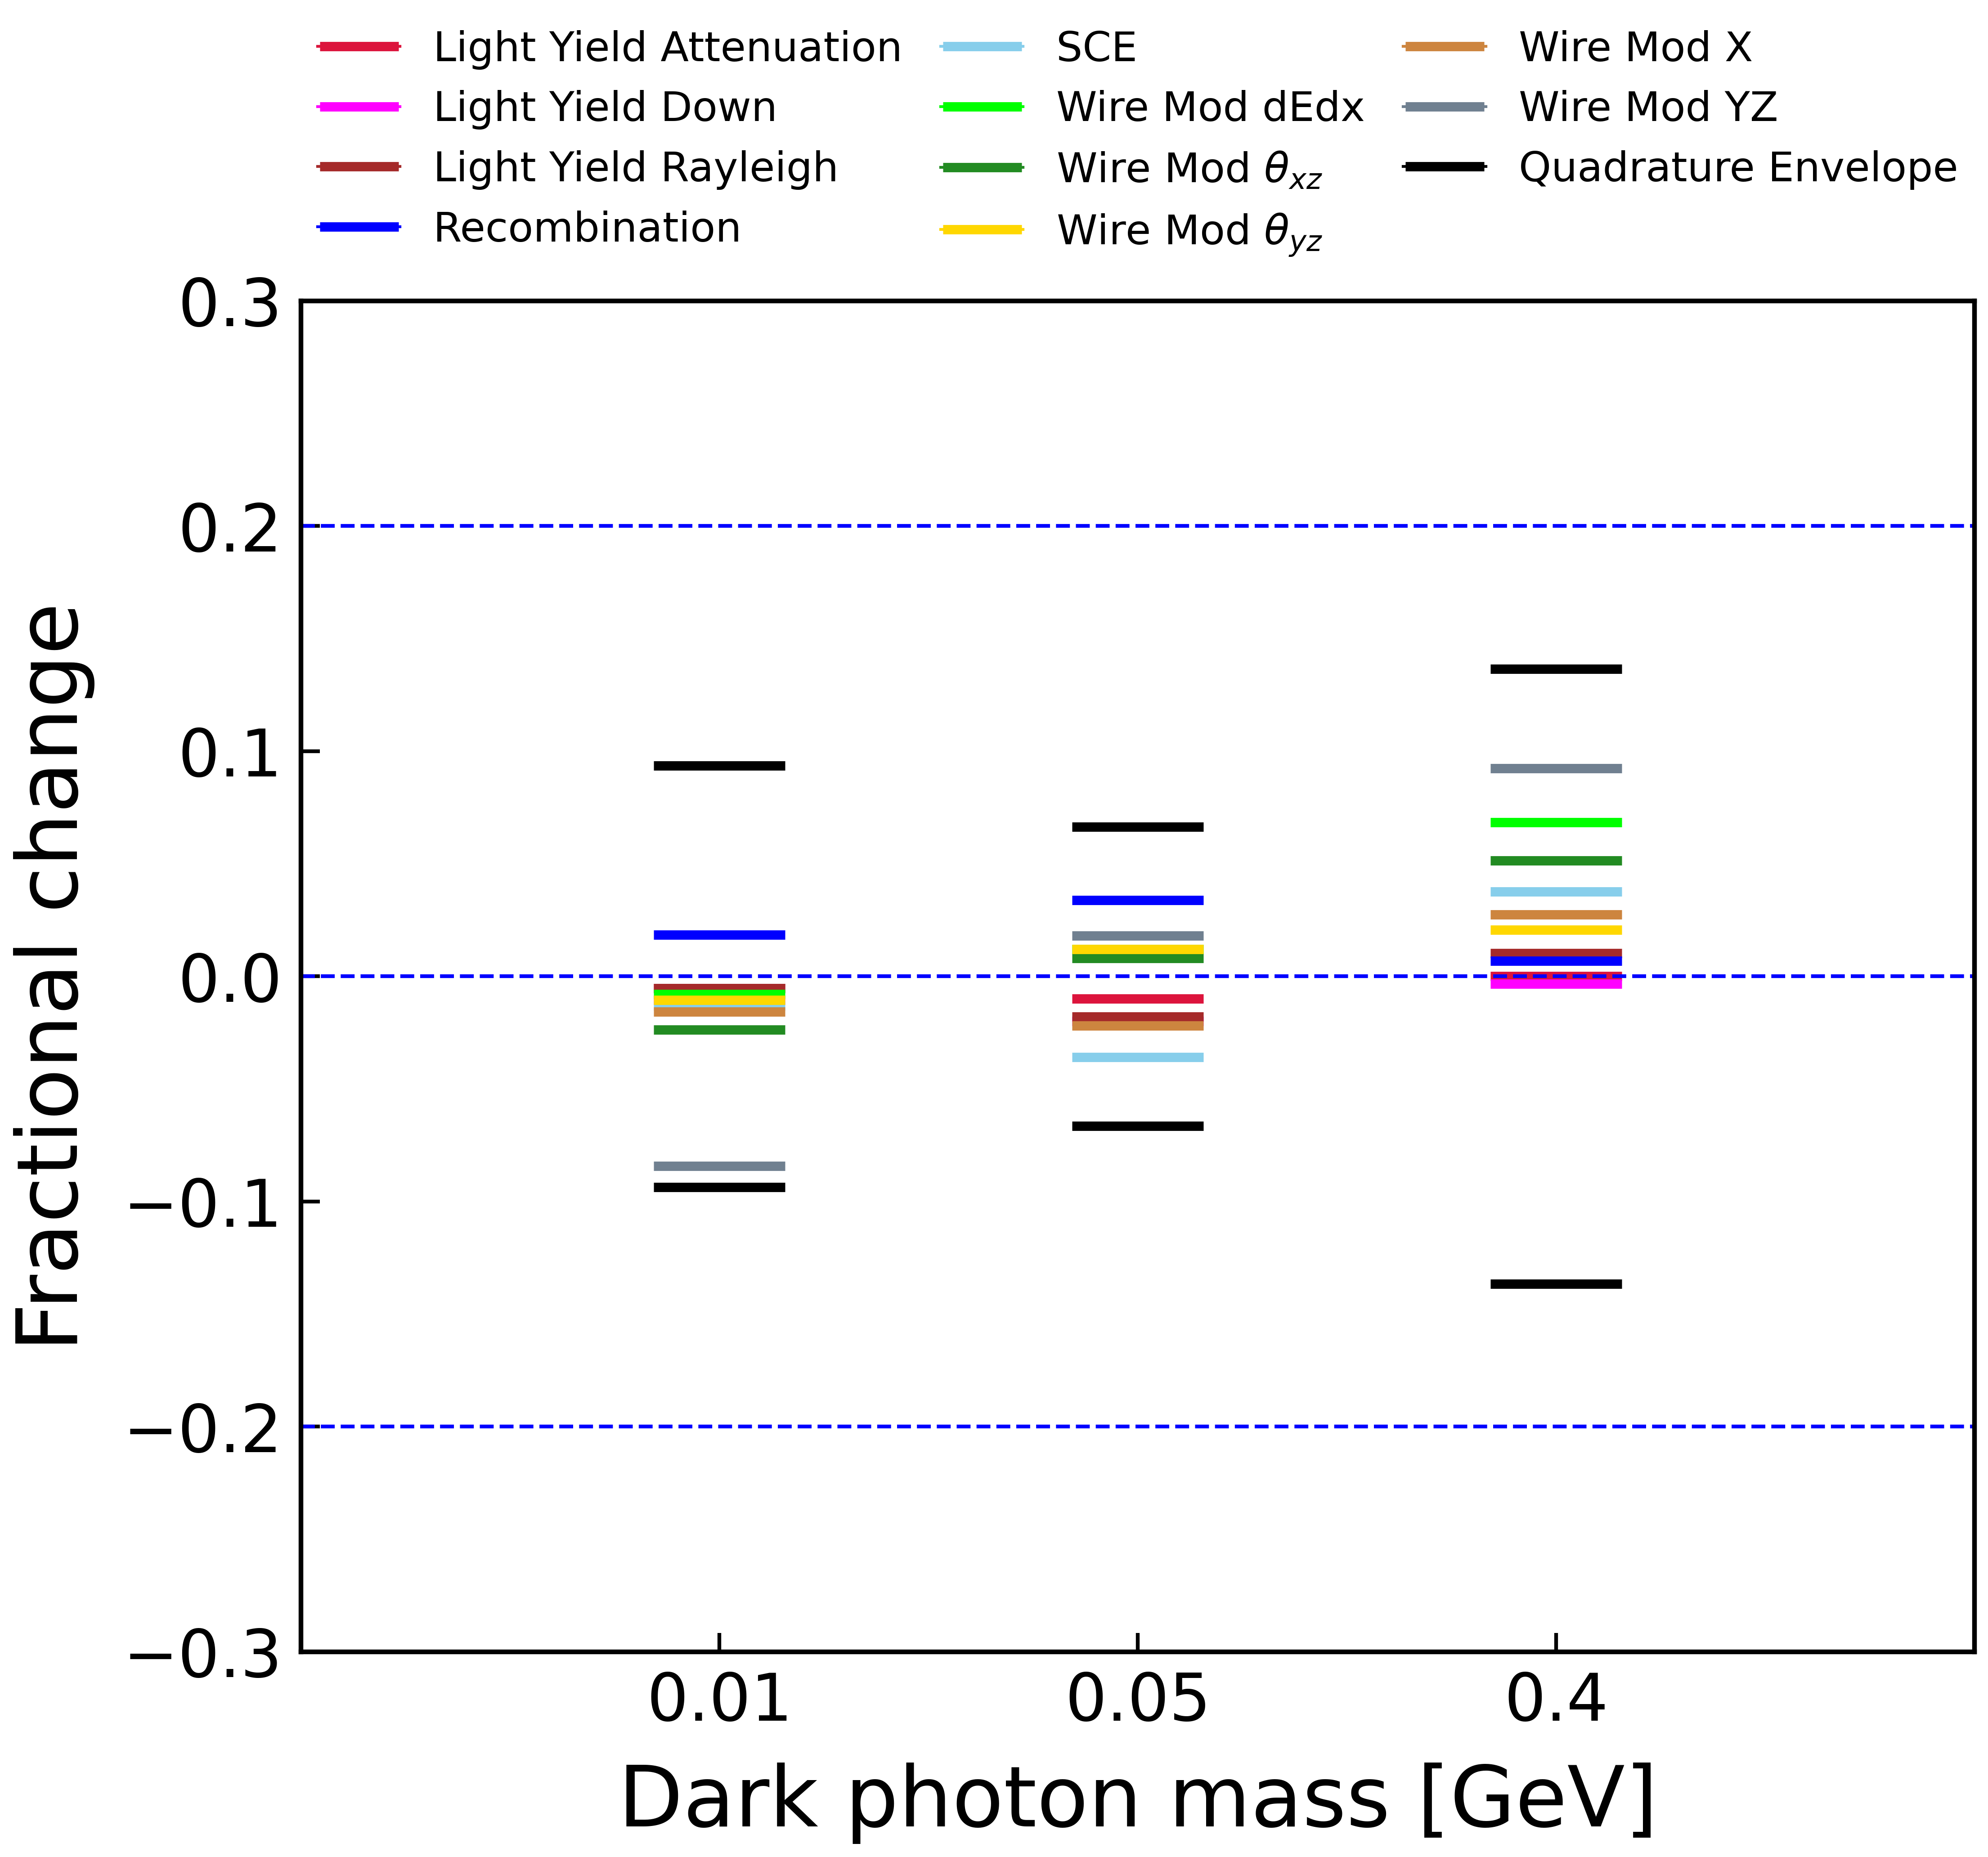

In [4]:
fig = plt.figure(figsize=(16,13),dpi=300)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

plt.xlabel('Dark photon mass [GeV]',size=45,labelpad=15)
plt.ylabel(r'Fractional change',size=45,labelpad=15)


for mass in masses: 
    variable = 'signal_score'
    df_list_pre = []
    df_list = []
    df_cv = pd.read_csv(base_dir + run + "_dt_ratio_"+ str(m_ratio) + "_ma_" + str(mass) + "_CV_CNN_scores_8441_steps.csv")
    df_cv = filter_df(df_cv,variable)
    df_list_pre.append(df_cv)
    
    for var in dt_variation:
        file_name=base_dir + run + "_dt_ratio_"+ str(m_ratio) + "_ma_" + str(mass) + "_" + var + "_CNN_scores_8441_steps.csv"
        #print("Opening file: " + file_name)
        df = pd.read_csv(file_name)
        df = filter_df(df,variable)
        df_list_pre.append(df)

    minimum = 10000000
    for df in df_list_pre:
        temp_min = len(df)
        if(minimum > temp_min):
            minimum = temp_min
        else:
            continue 

    print("Min entries: ", minimum)

    for df in df_list_pre:
        df_list.append(df.head(minimum))

    min_val = 0. #np.min(df_list[0]['bdt_score'])
    max_val = 11. #np.max(df_list[0]['bdt_score'])
    nbins = 8

    my_custom_bins = [ 0., 1.375, 2.75, 4.125, 5.5, 11.]

    (counts_cv, bins_cv) = np.histogram(logit_transform(df_list[0]['signal_score']), bins=my_custom_bins)
    df_list.pop(0)
    count_list = 0 

    error = np.zeros(len(my_custom_bins) -1)

    for df in df_list: 
        (counts, bins) = np.histogram(logit_transform(df['signal_score']), bins=my_custom_bins)
        ratio = (counts_cv - counts) # without CV
        plt.xticks(ticks=[0, 1, 2], labels=["0.01", "0.05", "0.4"])
        if(count_point==0):
            plt.plot(equidist_points[count_point],ratio[-1]/counts_cv[-1],marker='_',markersize=70, markeredgewidth=5,label=variation_legend[count_list],color=variations_colors[count_list])
    
        else:
            plt.plot(equidist_points[count_point],ratio[-1]/counts_cv[-1],marker='_',markersize=70, markeredgewidth=5,color=variations_colors[count_list])
        #plt.hist(1,bins=[mass],weights=[ratio[-1]],histtype='bar')
        error=ratio**2 + error
        count_list+=1
        
    if(count_point==0):
        plt.plot(equidist_points[count_point],np.sqrt(error[-1])/counts_cv[-1],marker="_",markersize=70,markeredgewidth=5,color='black',label='Quadrature Envelope')
    else:
        plt.plot(equidist_points[count_point],np.sqrt(error[-1])/counts_cv[-1],marker="_",markersize=70,markeredgewidth=5,color='black')
        
    plt.plot(equidist_points[count_point],-1*np.sqrt(error[-1])/counts_cv[-1],marker="_",markersize=70,markeredgewidth=5,color='black')

    count_point+=1 
       
plt.tick_params(axis="y", which='major', direction="in",length=10,width=2.0,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=2.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=10,width=2.0,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
legend = plt.legend(fontsize=22,bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3, markerscale=0.6, edgecolor='white')
legend.get_frame().set_alpha(None)
plt.hlines(0.20,-1,3,linestyles='dashed',color='blue',lw=2)
plt.hlines(0.,-1,3,linestyles='dashed',color='blue',lw=2)
plt.hlines(-0.20,-1,3,linestyles='dashed',color='blue',lw=2)
plt.xticks(size=35)
plt.yticks(size=35)
plt.xlim(-1,3)
plt.ylim(-0.3,0.3)
plt.savefig(figure_path + "{}_det_var_cnn_summary.pdf".format(run),bbox_inches="tight")
plt.savefig(figure_path + "{}_det_var_cnn_summary.png".format(run),bbox_inches="tight")
plt.show()